# Lunch Time Python

## 28.10.2022: PyTorch
<img style="width: 600px;" src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png">

[PyTorch](https://pytorch.org/) is a free and open-source machine learning framework that was originally developed by engineers at Facebook, but is now part of the Linux foundation. 
The two main features of PyTorch are its tensor computations framework (similar to numpy) with great support for GPU acceleration and their support for neural networks via autograd.

*Press `Spacebar` to go to the next slide (or `?` to see all navigation shortcuts)*

[Lunch Time Python](https://ssciwr.github.io/lunch-time-python/), [Scientific Software Center](https://ssc.iwr.uni-heidelberg.de), [Heidelberg University](https://www.uni-heidelberg.de/)

# 0 Why use PyTorch? 

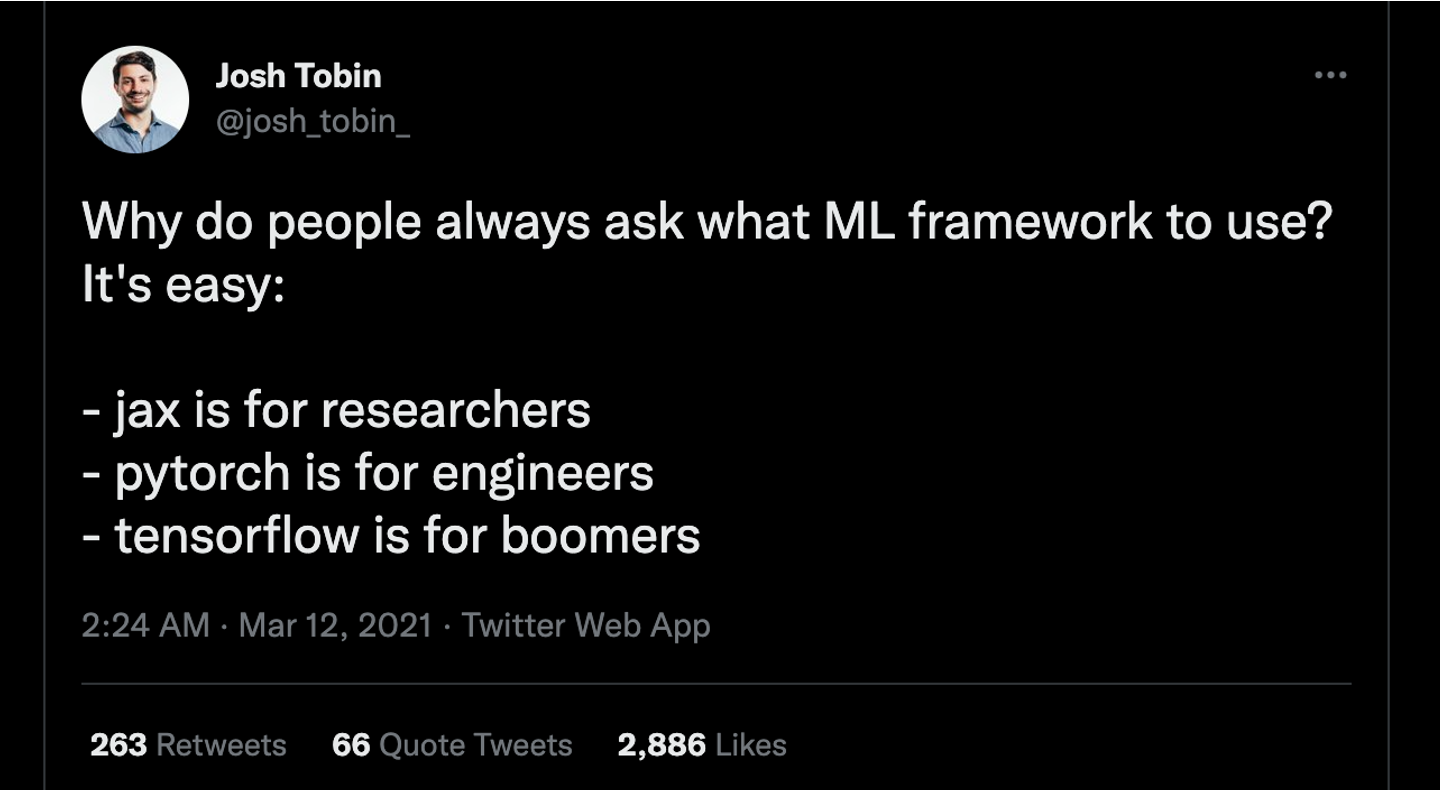

Source: Twitter

![Framework comparison](https://www.assemblyai.com/blog/content/images/2021/12/Fraction-of-Papers-Using-PyTorch-vs.-TensorFlow.png)

Source: Assembly AI

In [27]:
#first imports
import torch
from torch import nn #model
from torch import optim #optimizer
from torchvision import datasets, transforms #data and data transforms
from torch.utils.data import random_split, DataLoader #utilities

import numpy as np
import matplotlib.pyplot as plt

# 1 Tensors

In [28]:
#directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [29]:
#from numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [30]:
#from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4704, 0.5976],
        [0.7177, 0.9973]]) 



In [31]:
#use tuples to determine tensor dimensions
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4789, 0.2224, 0.5183],
        [0.7111, 0.7854, 0.9010]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [32]:
#tensor attributes
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [33]:
#by default, tensors are created on CPU
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [34]:
#indexing like numpy
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [35]:
#joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [36]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [37]:
#GPU via CUDA
torch.randn(5).cuda()

tensor([-0.2092, -0.0225,  1.3388,  0.0253,  2.0786], device='cuda:0')

# 2 Datasets and DataLoaders

- datasets: stores the samples and their corresponding labels
- DataLoader: wraps an iterable around the Dataset to enable easy access to the samples

In [38]:
#import and split data
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)


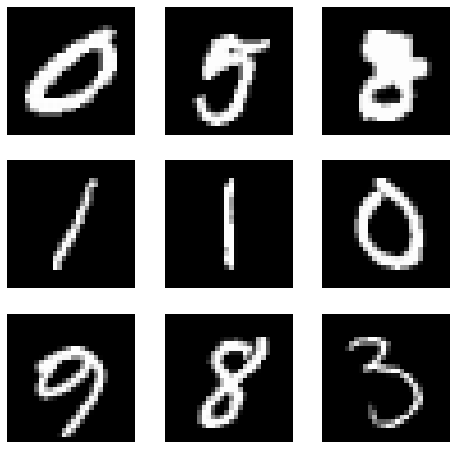

In [39]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


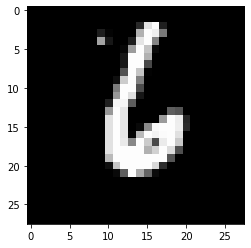

Label: 6


In [40]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 3 Coding a neural network

In [41]:
#in theory easy via stateless approach
#import torch.nn.functional as F

#loss_func = F.cross_entropy

#def model(xb):
#    return xb @ weights + bias

#print(loss_func(model(xb), yb), accuracy(model(xb), yb))
#gets messy quickly!

In [42]:
#define model via explicit nn.Module class
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(28 * 28, 64)
    self.l2 = nn.Linear(64, 64)
    self.l3 = nn.Linear(64, 10)
    self.do = nn.Dropout(0.1)
  
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1) #residual connection
    logits = self.l3(do)
    return logits

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered container of modules; good for easy and quick networks. No need to specify forward method!

In [43]:
#defining model via sequential
#shorthand, no need for forward method
model_seq = nn.Sequential(
    nn.Linear(28*28, 64), 
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.1), #often helps with overfitting
    nn.Linear(64,10)
)


In [44]:
#move model to GPU/device memory
model = model_seq.cuda() 

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In [45]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.1, inplace=False)
  (5): Linear(in_features=64, out_features=10, bias=True)
)


Layer: 0.weight | Size: torch.Size([64, 784]) | Values : tensor([[-0.0027, -0.0027, -0.0004,  ...,  0.0035,  0.0032,  0.0004],
        [ 0.0294,  0.0052,  0.0096,  ..., -0.0085, -0.0241, -0.0262]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([64]) | Values : tensor([-0.0041, -0.0095], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([64, 64]) | Values : tensor([[-0.0458,  0.0012, -0.0217, -0.0207,  0.0097, -0.0972,  0.0764, -0.0715,
          0.0329, -0.0254,  0.0749, -0.1001, -0.0545,  0.0143,  0.0824, -0.1135,
          0.0566,  0.0067, -0.0526,  0.0104, -0.1128,  0.1213,  0.0980,  0.1128,
          0.0831, -0.0585,  0.0305, -0.0850,  0.1002, -0

In [46]:
#define loss function
loss = nn.CrossEntropyLoss() #softmax + neg. log

# 4 Backpropagation via Autograd

![Computational graph](https://pytorch.org/tutorials/_images/comp-graph.png)

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor

- maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

- computes the gradients from each .grad_fn,

- accumulates them in the respective tensor’s .grad attribute

- using the chain rule, propagates all the way to the leaf tensors.

# 5 Optimization of model parameters (training)

We define the following hyperparameters for training:

- Number of Epochs - the number times to iterate over the dataset
- Batch Size - the number of data samples propagated through the network before the parameters are updated (defined in train_Loader)
- Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [47]:
lr = 1e-2
epochs = 5

In [48]:
#defining optimizer
params = model.parameters()
optimiser = optim.SGD(params, lr=1e-2)

Inside the training loop, optimization happens in three steps:

- Call **optimizer.zero_grad()** to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
- Backpropagate the prediction loss with a call to **loss.backward()**. PyTorch deposits the gradients of the loss w.r.t. each parameter.
- Once we have our gradients, we call **optimizer.step()** to adjust the parameters by the gradients collected in the backward pass.

In [49]:
#define training and validation loop
#training loop
for epoch in range(epochs):
  losses= list()
  accuracies = list()
  model.train() #enables dropout/batchnorm
  for batch in train_loader:
    x,y = batch
    batch_size = x.size(0)
    #x: b x 1 x 28 x 28
    x = x.view(batch_size, -1).cuda()

    #5 steps to train network
    # 1 forward
    l = model(x) # l: logits

    # 2 compute objective function
    J = loss(l, y.cuda())

    # 3 cleaning the gradients (could also call this on optimiser)
    model.zero_grad()
    #optimizer.zero_grad() is equivalent
    # manually: params.grad._zero()

    # 4 accumulate the partial derivatives of J wrt params 
    J.backward()
    #manually: params.grad.add_(dJ/dparams)

    # 5 step in the opposite direction of the gradient
    optimiser.step()
    # could have done manual gradient update:
    # with torch.no_grad(): 
    #   params = params - lr * params.grad
    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1).cpu()).float().mean())

  print(f"epoch {epoch + 1}", end=", ")
  print(f"training loss: {torch.tensor(losses).mean():.2f}", end=", ")
  print(f"training accuracy: {torch.tensor(accuracies).mean():.2f}") #print two decimals

  #validation loop
  losses= list()
  accuracies = list()
  model.eval() #disables dropout/batchnorm
  for batch in val_loader:
    x,y = batch
    batch_size = x.size(0)
    #x: b x 1 x 28 x 28
    x = x.view(batch_size, -1).cuda()

    #5 steps to train network
    # 1 forward
    with torch.no_grad(): #more efficient, just tensor no graph connected
      l = model(x) # l: logits

    # 2 compute objective function
    J = loss(l, y.cuda())
    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1).cpu()).float().mean())

  print(f"epoch {epoch + 1}", end=", ")
  print(f"validation loss: {torch.tensor(losses).mean():.2f}", end=", ")
  print(f"validation accuracy: {torch.tensor(accuracies).mean():.2f}") #print two decimals

epoch 1, training loss: 1.30, training accuracy: 0.60
epoch 1, validation loss: 0.50, validation accuracy: 0.86
epoch 2, training loss: 0.45, training accuracy: 0.87
epoch 2, validation loss: 0.36, validation accuracy: 0.90
epoch 3, training loss: 0.36, training accuracy: 0.89
epoch 3, validation loss: 0.31, validation accuracy: 0.91
epoch 4, training loss: 0.32, training accuracy: 0.91
epoch 4, validation loss: 0.27, validation accuracy: 0.92
epoch 5, training loss: 0.29, training accuracy: 0.92
epoch 5, validation loss: 0.25, validation accuracy: 0.93


# 6 Store models


In [50]:
# just save model weights without structure 
torch.save(model.state_dict(), 'model_weights.pth')
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.1, inplace=False)
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [51]:
#save whole model
torch.save(model, 'model.pth')
new_model = torch.load('model.pth')

# 7 Material sources/more resources:
- [PyTorch Tutorial Page](https://pytorch.org/tutorials/beginner/basics/)
- [YouTube Series for PyTorch Lightning](https://www.youtube.com/watch?v=OMDn66kM9Qc)
- [PyTorch common mistakes video from Alladin Persson](https://www.youtube.com/watch?v=O2wJ3tkc-TU&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=14)

Extra: interactive debugging during training loop

In [52]:
    #import pdb; pdb.set_trace() (put these commands after logit computation in training loop)
    #interactive debugger, leave via q
    # you can call the following commands interactively during the training loop
    # p l.size()
    # p l[0]
    # p l[0].detach().argmax()
    # p l[0].detach().softmax(dim=0)
    # p [f"{prob:.2f}" for prob in l[0].detach().softmax(dim=0)
    # p y[:4]
    # p l.detach().argmax(dim=1)[:4] 
    # p y[:4].eq(l.detach().argmax(dim=1)[:4])
    # p y.eq(l.detach().argmax(dim=1)).float().mean()